In [1]:
import numpy as np
import kirchhoff.circuit_init as kfi
from hailhydro.flow_init import Flow

from goflow.adapter import init_ivp as gi
from plotly_gif import GIF, capture
import plotly.graph_objects as go

#initialize circuit+flow pattern
# C = kfi.initialize_circuit_from_crystal('laves',3)
C = kfi.initialize_circuit_from_crystal('triagonal_planar',5).G
pars_src = {
    'modesSRC': 'root_geometric'
#     'modeSRC': 'root_short',
#     'modeSRC': 'dipole_border',
}
pars_plx = {
    'modePLX':'default',
}
# set model and model parameters
pars_model = {
    'alpha_0':1.,
    'alpha_1':1.
}
# # initialize dynamic system and set integration parameters
morpheus = gi.morph_dynamic(C, 'murray', [pars_model, pars_src, pars_plx]) 
morpheus.evals = 200

Set source: default
set_source_landscape(): default is set and consistent :)
Set plexus: default
set_plexus_landscape(): default is set and consistent :)


In [2]:
# numerically evaluate the system
cnd = morpheus.flow.circuit.edges['conductivity']
cnd_scale = morpheus.flow.circuit.scales['conductance']

sp = {
    't0': 1e-05,
    't1': 4.,
    'x0': np.power(cnd/cnd_scale,0.25)*0.1,
}
nsol = morpheus.nlogSolve((sp['t0'],sp['t1']), sp['x0'])
# print(nsol)

dataPoints = zip(nsol.t,nsol.y.transpose())
murrayModel = morpheus.model
args = murrayModel.solver_options['args']
cost = [murrayModel.calc_cost_stimuli(t, y, *args)[0] for t, y in dataPoints]

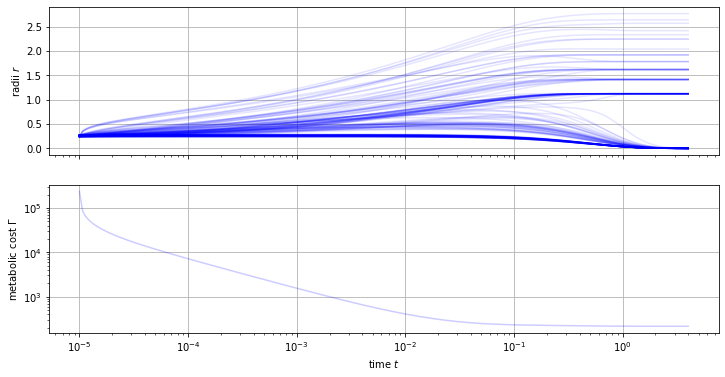

In [3]:
# # plot dynamic data such as radii and costs
import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,1,figsize=(12,6),sharex=True)
axs[0].plot(nsol.t,nsol.y.transpose(),alpha=0.1,color='b')
axs[1].plot(nsol.t,cost,alpha=0.2,color='b')

for i in range(2):
    axs[i].grid(True)
    axs[i].set_xscale('log')
    
axs[1].set_xlabel(r'time $t$')
axs[0].set_ylabel(r'radii $r$')
axs[1].set_ylabel(r'metabolic cost $\Gamma$')
axs[1].set_yscale('log')
plt.show()

In [4]:
kwargs = dict(
    length=10000, 
#     loop=1,
)

In [5]:
opts = dict(
    gif_name = 'murray_triagonal_plexus.gif', 
    gif_path = '../gallery'
)
gif = GIF(**opts)

# Construct list of frames
frames = []

@capture(gif)
def newfig(y):
    
    morpheus.flow.circuit.edges['conductivity'] = y
    lw = morpheus.flow.circuit.edges['conductivity']
    z = np.divide(lw, np.amax(lw))
    
    aux = {
        'color_nodes': ['#030512'],
        'color_edges': [z],
        'colormap': ['RdPu'],
    }
    
    figX = morpheus.flow.circuit.plot_circuit(linewidth = [10.*lw], **aux)
    
    return figX

for y in nsol.y.transpose()[:]:
    frame = newfig(y)
    frames.append(frame)

gif.create_gif(**kwargs) # generate gif

  Image 1 captured. (elapsed time: 0.0 min; 1 sec)
  Image 2 captured. (elapsed time: 0.0 min; 1 sec)
  Image 3 captured. (elapsed time: 0.0 min; 1 sec)
  Image 4 captured. (elapsed time: 0.0 min; 2 sec)
  Image 5 captured. (elapsed time: 0.0 min; 2 sec)
  Image 6 captured. (elapsed time: 0.0 min; 3 sec)
  Image 7 captured. (elapsed time: 0.0 min; 3 sec)
  Image 8 captured. (elapsed time: 0.0 min; 3 sec)
  Image 9 captured. (elapsed time: 0.0 min; 4 sec)
  Image 10 captured. (elapsed time: 0.0 min; 4 sec)
  Image 11 captured. (elapsed time: 0.0 min; 4 sec)
  Image 12 captured. (elapsed time: 0.0 min; 5 sec)
  Image 13 captured. (elapsed time: 0.0 min; 5 sec)
  Image 14 captured. (elapsed time: 0.0 min; 5 sec)
  Image 15 captured. (elapsed time: 0.0 min; 6 sec)
  Image 16 captured. (elapsed time: 0.0 min; 6 sec)
  Image 17 captured. (elapsed time: 0.0 min; 7 sec)
  Image 18 captured. (elapsed time: 0.0 min; 7 sec)
  Image 19 captured. (elapsed time: 0.0 min; 7 sec)
  Image 20 captured. 

  Image 156 captured. (elapsed time: 0.0 min; 56 sec)
  Image 157 captured. (elapsed time: 0.0 min; 56 sec)
  Image 158 captured. (elapsed time: 0.0 min; 56 sec)
  Image 159 captured. (elapsed time: 0.0 min; 57 sec)
  Image 160 captured. (elapsed time: 0.0 min; 57 sec)
  Image 161 captured. (elapsed time: 0.0 min; 57 sec)
  Image 162 captured. (elapsed time: 0.0 min; 58 sec)
  Image 163 captured. (elapsed time: 0.0 min; 58 sec)
  Image 164 captured. (elapsed time: 0.0 min; 58 sec)
  Image 165 captured. (elapsed time: 0.0 min; 59 sec)
  Image 166 captured. (elapsed time: 0.0 min; 59 sec)
  Image 167 captured. (elapsed time: 0.0 min; 59 sec)
  Image 168 captured. (elapsed time: 1.0 min; 0 sec)
  Image 169 captured. (elapsed time: 1.0 min; 0 sec)
  Image 170 captured. (elapsed time: 1.0 min; 0 sec)
  Image 171 captured. (elapsed time: 1.0 min; 1 sec)
  Image 172 captured. (elapsed time: 1.0 min; 1 sec)
  Image 173 captured. (elapsed time: 1.0 min; 1 sec)
  Image 174 captured. (elapsed tim

In [6]:
opts = dict(
    gif_name = 'murray_triagonal_dynm.gif', 
    gif_path = '../gallery'
)
gif = GIF(**opts)
# Construct list of frames
frames = []

y_min = np.amin(nsol.y)
y_max = np.amax(nsol.y)
x_min = np.amin(nsol.t)
x_max = np.amax(nsol.t)

@capture(gif)
def plotDynm(y,t):

    fig = go.Figure()
    
    for ys in Y:
        fig.add_trace(
            go.Scatter(
                x=T, 
                y= ys, 
                mode='lines',
                line=dict(color='rgba(0,0,255,0.1)'),
            )
        )
    fig.update_layout( dict(
#         xaxis=dict(range=[x_min, x_max], autorange=False),
#         yaxis=dict(range=[y_min, y_max], autorange=False),
        showlegend =  False,
        )
    )
    fig.update_xaxes(type="log",
                     range=[*np.log10([x_min, x_max])]
                    )# log range: 10^0=1, 10^5=100000
    fig.update_yaxes(range=[y_min, y_max]) # linear range
    
    return fig

for i,t in enumerate(nsol.t):
    
    try:
        Y = nsol.y[:,:i+1]
        T = nsol.t[:i+1]
        
    except:
        Y = nsol.y[:,:]
        T = nsol.t[:]
        
    frame = plotDynm(Y, T)
    frames.append(frame)

gif.create_gif(**kwargs) # generate gif

  Image 1 captured. (elapsed time: 0.0 min; 0 sec)
  Image 2 captured. (elapsed time: 0.0 min; 0 sec)
  Image 3 captured. (elapsed time: 0.0 min; 0 sec)
  Image 4 captured. (elapsed time: 0.0 min; 0 sec)
  Image 5 captured. (elapsed time: 0.0 min; 1 sec)
  Image 6 captured. (elapsed time: 0.0 min; 1 sec)
  Image 7 captured. (elapsed time: 0.0 min; 1 sec)
  Image 8 captured. (elapsed time: 0.0 min; 1 sec)
  Image 9 captured. (elapsed time: 0.0 min; 2 sec)
  Image 10 captured. (elapsed time: 0.0 min; 2 sec)
  Image 11 captured. (elapsed time: 0.0 min; 2 sec)
  Image 12 captured. (elapsed time: 0.0 min; 2 sec)
  Image 13 captured. (elapsed time: 0.0 min; 2 sec)
  Image 14 captured. (elapsed time: 0.0 min; 3 sec)
  Image 15 captured. (elapsed time: 0.0 min; 3 sec)
  Image 16 captured. (elapsed time: 0.0 min; 3 sec)
  Image 17 captured. (elapsed time: 0.0 min; 3 sec)
  Image 18 captured. (elapsed time: 0.0 min; 4 sec)
  Image 19 captured. (elapsed time: 0.0 min; 4 sec)
  Image 20 captured. 

  Image 156 captured. (elapsed time: 0.0 min; 49 sec)
  Image 157 captured. (elapsed time: 0.0 min; 50 sec)
  Image 158 captured. (elapsed time: 0.0 min; 50 sec)
  Image 159 captured. (elapsed time: 0.0 min; 50 sec)
  Image 160 captured. (elapsed time: 0.0 min; 51 sec)
  Image 161 captured. (elapsed time: 0.0 min; 51 sec)
  Image 162 captured. (elapsed time: 0.0 min; 52 sec)
  Image 163 captured. (elapsed time: 0.0 min; 52 sec)
  Image 164 captured. (elapsed time: 0.0 min; 52 sec)
  Image 165 captured. (elapsed time: 0.0 min; 53 sec)
  Image 166 captured. (elapsed time: 0.0 min; 53 sec)
  Image 167 captured. (elapsed time: 0.0 min; 53 sec)
  Image 168 captured. (elapsed time: 0.0 min; 54 sec)
  Image 169 captured. (elapsed time: 0.0 min; 54 sec)
  Image 170 captured. (elapsed time: 0.0 min; 55 sec)
  Image 171 captured. (elapsed time: 0.0 min; 55 sec)
  Image 172 captured. (elapsed time: 0.0 min; 55 sec)
  Image 173 captured. (elapsed time: 0.0 min; 56 sec)
  Image 174 captured. (elaps